In [1]:
# Setting Up Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import gmaps
from config import api_key
from config import w_key
import numpy as np

gkey = api_key
gmaps.configure(api_key=gkey)

In [2]:
# Generating random Brewery IDs

brewery_id = []

for x in range(1000):
    brewery_id.append(np.random.randint(0, 6000))

    brewery_id

unique_brewery = pd.DataFrame({"ID" : brewery_id})

unique_id = list(unique_brewery["ID"].unique())

print(f"Gathered {len(unique_id)} unique Brewery IDs.")

Gathered 921 unique Brewery IDs.


In [ ]:
# Retrieving Raw Brewery Data
brewery_df = []
start = time.time()
for x in range(len(unique_id)):
    try:
        url = "https://api.openbrewerydb.org/breweries/" + str(unique_id[x])
        response = requests.get(url).json()
        brewery_df.append(response)
        print(f"({x+1}/{len(unique_id)}) Retrieved Brewery ID {unique_id[x]}...")

    except:
        print(f"({x+1}/{len(unique_id)}) Timeout for Brewery ID {unique_id[x]}... skipping")
        
stop = time.time()
time_elapsed = round((stop - start)/60,2)
print(f"\nRetrieved {len(unique_id)} breweries... Time elapsed: {time_elapsed} minutes.")

(1/921) Retrieved Brewery ID 5317...
(2/921) Retrieved Brewery ID 4990...
(3/921) Retrieved Brewery ID 5008...
(4/921) Retrieved Brewery ID 2557...
(5/921) Retrieved Brewery ID 4945...
(6/921) Retrieved Brewery ID 2153...
(7/921) Retrieved Brewery ID 4351...
(8/921) Retrieved Brewery ID 2886...
(9/921) Retrieved Brewery ID 1700...
(10/921) Retrieved Brewery ID 5081...
(11/921) Retrieved Brewery ID 4645...
(12/921) Retrieved Brewery ID 261...
(13/921) Retrieved Brewery ID 3005...
(14/921) Retrieved Brewery ID 865...
(15/921) Retrieved Brewery ID 1124...
(16/921) Retrieved Brewery ID 3454...
(17/921) Retrieved Brewery ID 766...
(18/921) Retrieved Brewery ID 3641...
(19/921) Retrieved Brewery ID 5417...
(20/921) Retrieved Brewery ID 3853...
(21/921) Retrieved Brewery ID 3956...
(22/921) Retrieved Brewery ID 1310...
(23/921) Retrieved Brewery ID 712...
(24/921) Retrieved Brewery ID 4842...
(25/921) Retrieved Brewery ID 797...
(26/921) Retrieved Brewery ID 4711...
(27/921) Retrieved Brewery

In [5]:
# Creating DataFrame
brewery_df = pd.DataFrame(brewery_df)
brewery_df.to_csv("raw_brewery_data.csv")
brewery_df.head()

NameError: name 'brewery_df' is not defined

In [5]:
# Drop rows with "None" Lats/Lngs
brewery_df = brewery_df[brewery_df.latitude.str.contains("None") == False]
print(f"Dropped {len(unique_id) - len(brewery_df)} breweries from DataFrame which did not have coordinates.\nTotal Brewery count: {len(brewery_df)}") 
      

Dropped 340 breweries from DataFrame which did not have coordinates.
Total Brewery count: 577


In [6]:
brewery_loc = brewery_df[['latitude','longitude']].astype(float)
brewery_loc.head()

,latitude,longitude
1,39.780001,-104.979194
3,41.446930,-74.416225
4,42.089819,-72.533809
5,45.371155,-122.796784
6,44.760140,-85.620431


In [11]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(brewery_loc, dissipating=False, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
#Grabbing list of breweries from brewery_df
brewery_names = brewery_df['name'].tolist()
brewery_cities = brewery_df['city'].tolist()

In [13]:
#Grabbing weather info for cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={w_key}&units={units}&q="
temps=[]
x=0
for city in brewery_cities:
    x=x+1
    city_dic = {'name':'','temp':''}
    response = requests.get(query_url + city).json()
    
    if (response['cod'] != "404" and response['cod'] != "500"):      
        city_dic['name'] = response['name']
        city_dic['temp'] = response['main']['temp_max']
        temps.append(city_dic)
        print(f"({x}/{len(brewery_cities)}) {city} weather data found...")
    else:
        print(f"({x}/{len(brewery_cities)}) {city} not found... skipping")
    

(1/577) Denver weather data found...
(2/577) Middletown weather data found...
(3/577) Springfield weather data found...
(4/577) Tualatin weather data found...
(5/577) Traverse City weather data found...
(6/577) Cincinnati weather data found...
(7/577) Bar Harbor weather data found...
(8/577) Santa Fe weather data found...
(9/577) Norco weather data found...
(10/577) Portland weather data found...
(11/577) Bucksport weather data found...
(12/577) Astoria weather data found...
(13/577) Buffalo weather data found...
(14/577) Bangor weather data found...
(15/577) Tucson weather data found...
(16/577) Grand Rapids weather data found...
(17/577) Buckeye Lake weather data found...
(18/577) Portland weather data found...
(19/577) Arvada weather data found...
(20/577) Norfolk weather data found...
(21/577) Artesia weather data found...
(22/577) Red Lodge weather data found...
(23/577) Phoenix weather data found...
(24/577) Tucson weather data found...
(25/577) Hailey weather data found...
(26/5

(201/577) Burlington weather data found...
(202/577) Watertown weather data found...
(203/577) Beacon weather data found...
(204/577) Manhattan weather data found...
(205/577) Albany weather data found...
(206/577) Milford weather data found...
(207/577) Fort Collins weather data found...
(208/577) Peoria weather data found...
(209/577) Augusta weather data found...
(210/577) Ketchikan weather data found...
(211/577) Edina weather data found...
(212/577) Tulsa weather data found...
(213/577) Grand Marais weather data found...
(214/577) Arden weather data found...
(215/577) San Francisco weather data found...
(216/577) Oakridge weather data found...
(217/577) Roseburg weather data found...
(218/577) Chicago weather data found...
(219/577) Christopher weather data found...
(220/577) Laughlin weather data found...
(221/577) Berkeley weather data found...
(222/577) Delaware weather data found...
(223/577) Los Angeles weather data found...
(224/577) Signal Hill weather data found...
(225/57

(400/577) Wolcott weather data found...
(401/577) Birmingham weather data found...
(402/577) Middleburg Heights weather data found...
(403/577) Sherburne weather data found...
(404/577) Portland weather data found...
(405/577) Chatsworth weather data found...
(406/577) Saint Peters weather data found...
(407/577) Whitehall weather data found...
(408/577) Redmond weather data found...
(409/577) Fairfield weather data found...
(410/577) Brooklyn weather data found...
(411/577) Youngstown weather data found...
(412/577) San Diego weather data found...
(413/577) Los Angeles weather data found...
(414/577) West Branch weather data found...
(415/577) Newport weather data found...
(416/577) Jacksonville weather data found...
(417/577) Gilroy weather data found...
(418/577) Geneseo weather data found...
(419/577) Mt Pleasant weather data found...
(420/577) Longmont weather data found...
(421/577) Cleveland Heights weather data found...
(422/577) Hampden weather data found...
(423/577) South Sa

In [14]:
#Turn weather info into dataframe
temp_df = pd.DataFrame(temps)
temp_df = temp_df.rename(columns = {'name':'city'})
temp_df

,city,temp
0,Denver,41.36
1,Middletown,64.04
2,Springfield,73.94
3,Tualatin,60.98
4,Traverse City,75.56
5,Cincinnati,77.00
6,Bar Harbor,51.08
7,Santa Fe,80.60
8,Norco,68.00
9,Portland,60.98


In [15]:
#Grabbing Brewery info
#base url for google places
base_url2 = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
ratings=[]
bad_names = []
zero_rating = []
x = 0
for name in brewery_names:
    x = x+1
    rat_dic = {'name': name,'rating':''}
    params = {'input': name, 'inputtype': 'textquery',
          'fields':'rating', 'key': api_key }
    response = requests.get(base_url2, params=params).json()
    
    try:
        if response['candidates'][0]['rating'] != 0.0:
            rat_dic['rating'] = response['candidates'][0]['rating']
            ratings.append(rat_dic)
            print(f"({x}/{len(brewery_names)}) Found rating for {name}...")
        else:
            print(f"({x}/{len(brewery_names)}) Zero rating for {name}...")      
            zero_rating.append(name)  
            
    except:
        #creating a list of names that don't return anything 
        print(f"({x}/{len(brewery_names)}) Could not find rating for {name}...") 
        bad_names.append(name)
        

(1/577) Found rating for J Moe's Brewing Company...
(2/577) Found rating for Clemson Bros. Brewery...
(3/577) Could not find rating for White Lion Brewing Company...
(4/577) Found rating for Ancestry Brewery...
(5/577) Found rating for The Parlor...
(6/577) Found rating for Taft's Ale House...
(7/577) Found rating for Jack Russell's Steakhouse and Brewery / Maine Coast Brewing Co....
(8/577) Could not find rating for Santa Fe Brewing Co...
(9/577) Found rating for Sons of Liberty Aleworks...
(10/577) Found rating for Breakside Brewery Slabtown...
(11/577) Found rating for Friars' Brewhouse...
(12/577) Found rating for Astoria Brewing Company...
(13/577) Found rating for Resurgence Brewing Company...
(14/577) Found rating for Cognito Brewing Company...
(15/577) Could not find rating for Sentinel Peak Brewing Company...
(16/577) Found rating for Elk Brewing Co...
(17/577) Found rating for Buckeye Lake Brewery...
(18/577) Zero rating for Madcow Brewing Co....
(19/577) Found rating for New

(153/577) Found rating for White Oak Brewing...
(154/577) Found rating for Bang the Drum Brewery...
(155/577) Found rating for Council Brewing Company...
(156/577) Could not find rating for McMenamins Breweries...
(157/577) Found rating for Invictus Brewing Co....
(158/577) Found rating for Haint Blue Brewing Company...
(159/577) Found rating for Clayton Brewing Co...
(160/577) Found rating for Les Cheneaux Distillers...
(161/577) Found rating for St Nicholas Brewing Co...
(162/577) Found rating for Ritual Brewing Co...
(163/577) Found rating for Knotty Brewing Co....
(164/577) Found rating for Staas Brewing Company...
(165/577) Found rating for Vanished Valley Brewing Company...
(166/577) Found rating for Jackrabbit Brewing Co...
(167/577) Found rating for Fifty West Brewing Co...
(168/577) Found rating for Hermiston Brewing Co...
(169/577) Found rating for 4204 Main Street Brewing Co...
(170/577) Found rating for Bombshell Beer Company...
(171/577) Found rating for Pryes Brewing Comp

(305/577) Found rating for Trailhead Brewing Co...
(306/577) Found rating for Kings County Brewers Collective...
(307/577) Found rating for Big Bear Brewing Co...
(308/577) Found rating for Glenmere Brewing Co, Inc...
(309/577) Found rating for Silo's...
(310/577) Found rating for Main Channel Brewing Company...
(311/577) Found rating for Good Nature Farm Brewery...
(312/577) Found rating for El Toro Brewing Company Brewpub...
(313/577) Found rating for Saucy Brew Works...
(314/577) Found rating for Edward Teach Brewing...
(315/577) Found rating for Nickel Beer Co...
(316/577) Found rating for Obed & Isaac's...
(317/577) Could not find rating for Drumming Grouse Brewery, LLC...
(318/577) Found rating for Riff Raff Brewing...
(319/577) Could not find rating for Birmingham District Brewing...
(320/577) Found rating for New Jersey Beer Co...
(321/577) Found rating for Fat Hill Brewing...
(322/577) Found rating for Black Pond Brews...
(323/577) Could not find rating for Burnin Daylight Bre

(458/577) Found rating for New Terrain Brewing Company...
(459/577) Found rating for Oswald Brewing Company...
(460/577) Found rating for Bill's Brewing Co....
(461/577) Found rating for Hanging Hills Brewing Company...
(462/577) Found rating for Central State Brewing...
(463/577) Found rating for Three Twenty Brewing Co....
(464/577) Found rating for Two Kilts Brewing...
(465/577) Zero rating for Burgundian Brewing Co....
(466/577) Found rating for Toro Creek Brewing Co...
(467/577) Found rating for Pinetop Brewing Company...
(468/577) Found rating for New England Brewing Co...
(469/577) Could not find rating for Bear Republic Brewing Co...
(470/577) Found rating for Brioux City Brewery...
(471/577) Found rating for Dead Oak Brewing Company...
(472/577) Could not find rating for Laurelwood Public House and Brewery - NE...
(473/577) Could not find rating for Cigar City Brewing Co...
(474/577) Found rating for The Ravenous Pig / Cask & Larder...
(475/577) Found rating for Mt Tabor Brewi

In [ ]:
ratings_df = pd.DataFrame(ratings)
ratings_df

In [ ]:
#Merging Data Frames
brewery_temp = pd.merge(brewery_df,temp_df, on = 'city')
brewery_temp

In [ ]:
Brewery_temp_rating = pd.merge(brewery_temp, ratings_df, on="name")
B_T_R = Brewery_temp_rating[['brewery_type','name','state', 'city','temp','rating']]
B_T_R

In [24]:
B_T_R.duplicated() # this shows duplicted rows in the dataframe

0       False
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20      False
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1312    False
1313    False
1314     True
1315    False
1316     True
1317    False
1318    False
1319    False
1320    False
1321    False
1322     True
1323    False
1324     True
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
1336    False
1337    False
1338    False
1339    False
1340    False
1341    False
Length: 1342, dtype: bool

In [28]:
Brewery_Temp_Ratings=B_T_R.drop_duplicates(keep=False).shape
Brewery_Temp_Ratings

(291, 6)

In [2]:
Brewery_Types=B_T_R.drop_duplicates('name')
Brewery_Type = Brewery_Types.rename(columns = {'brewery_type':'Brewery Type','name':'Brewery Company','state':'States','city':'City','temp':'Current Temperature','rating':'Brewery Companies Ratings' })
#Brewery_Typ = Brewery_Type.set_index('Brewery_Types')'brewery_type' :'Brewery Types'
Brewery_Type

NameError: name 'B_T_R' is not defined

In [34]:
#Merging Data Frames
#brewery_temp = brewery_df.merge(brewery_df,temp_df, on = 'city') 
# brewery_and_temp
#brewery_and_temp1 = brewery_and_temp[['brewery_type','city','name','temp']]
#brewery_temp_rating = brewery_and_temp1.merge(ratings_df, how = 'outer', on = 'name')
#dataset_clean = brewery_temp_rating.dropna(how = 'any')
# dataset_clean
#dataset_clean1 = dataset_clean.drop_duplicates('name')
#dataset_clean2 = dataset_clean1.set_index('name')
#dataset_clean2

In [76]:
#Brewery_Types by Total Ratings
Bre_Types = Brewery_Type_Ratings.groupby("Brewery_Type")["Brewery Companies Ratings"].count()
Bre_Types

KeyError: 'Brewery_Type'

In [1]:
Bre_Types_State = Brewery_Type_Ratings.groupby("S")["Brewery Companies Ratings"].mean()
Bre_Types_State

NameError: name 'Brewery_Type_Ratings' is not defined

In [52]:
Bre_Types_Mean = Brewery_Type_Ratings.groupby("brewery_type")["Brewery Companies Ratings"].mean()
Bre_Types_Mean

brewery_type
brewpub       4.383598
contract      4.514286
large         4.600000
micro         4.643015
planning      4.725000
proprietor    3.975000
regional      4.483333
Name: Brewery Companies Ratings, dtype: float64

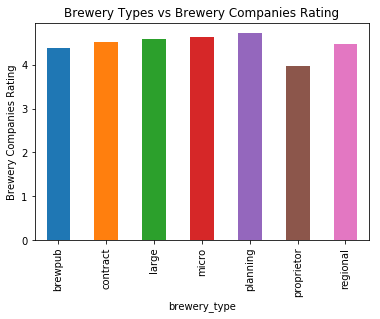

<Figure size 432x288 with 0 Axes>

In [67]:
# Bar chart of brewery type by the mean of their rating type
Bar_Brew_Type = Bre_Types_Mean.plot(kind='bar')
# Set the xlabel and ylabel using class methods
x_axis =Bar_Brew_Type.set_xlabel("brewery_type")
y_axis =Bar_Brew_Type.set_ylabel("Brewery Companies Rating")
plt.bar()
plt.title("Brewery Types vs Brewery Companies Rating")
plt.show()
plt.tight_layout()

In [68]:
Bre_Types_State1 = Brewery_Type_Ratings.groupby(["States","Brewery Companies Ratings"])
Bre_Types_State1

In [63]:
#Bre_Types_State1 = Brewery_Type_Ratings.groupby(["States","Brewery Companies Ratings"]).count()
#Bre_Types_State1